In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [58]:
# Load the dataset
train = pd.read_csv('C:/Users/vijay/OneDrive/Documents/Python/projects/titanic.csv')


In [62]:
# Display the first few rows of the dataset
print(train.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [64]:
# Check for missing values
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


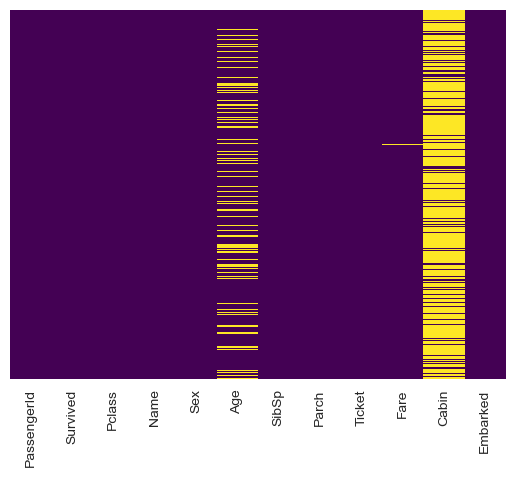

In [68]:
# Visualize missing data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()


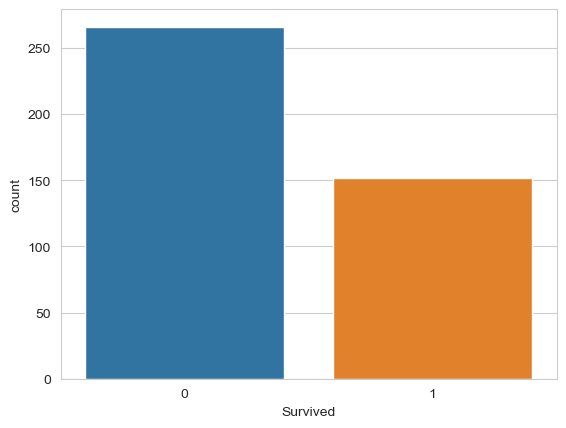

In [70]:
# Count plot for survival
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)
plt.show()

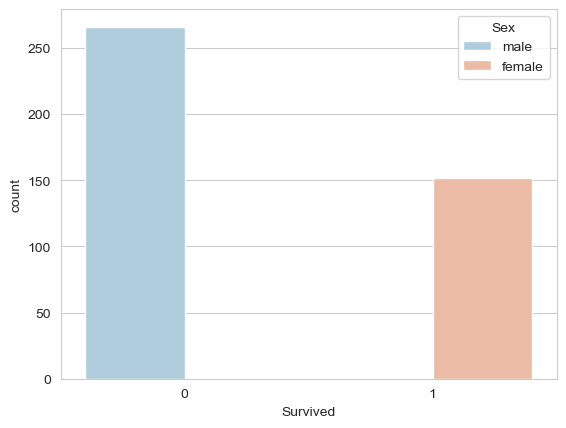

In [72]:
# Count plot for survival by sex
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')
plt.show()

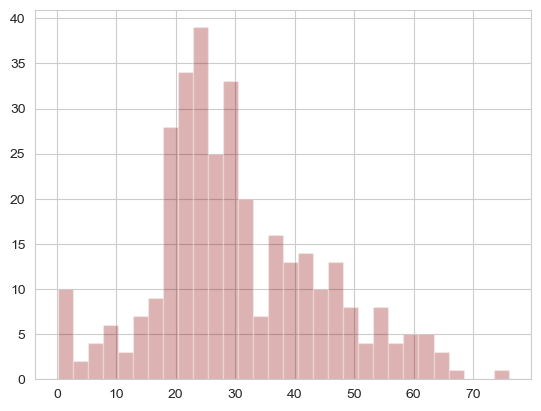

In [74]:
# Histogram for age distribution
train['Age'].hist(bins=30, color='darkred', alpha=0.3)
plt.show()

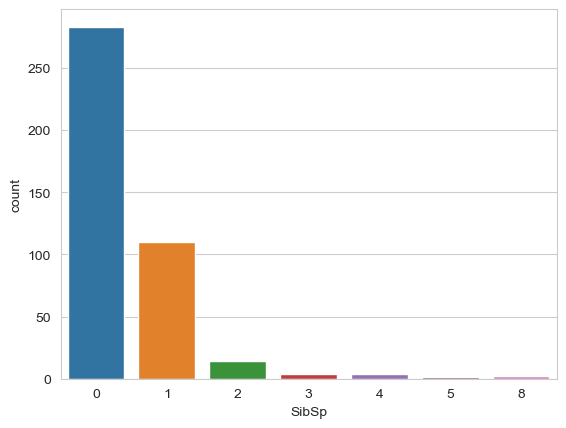

In [76]:
# Count plot for siblings/spouses aboard
sns.countplot(x='SibSp', data=train)
plt.show()

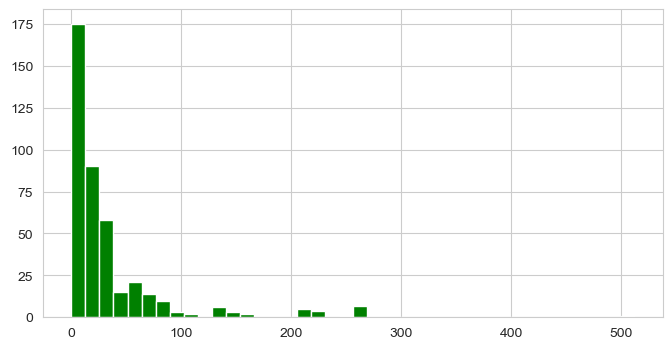

In [78]:
# Histogram for fare distribution
train['Fare'].hist(color='green', bins=40, figsize=(8, 4))
plt.show()

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


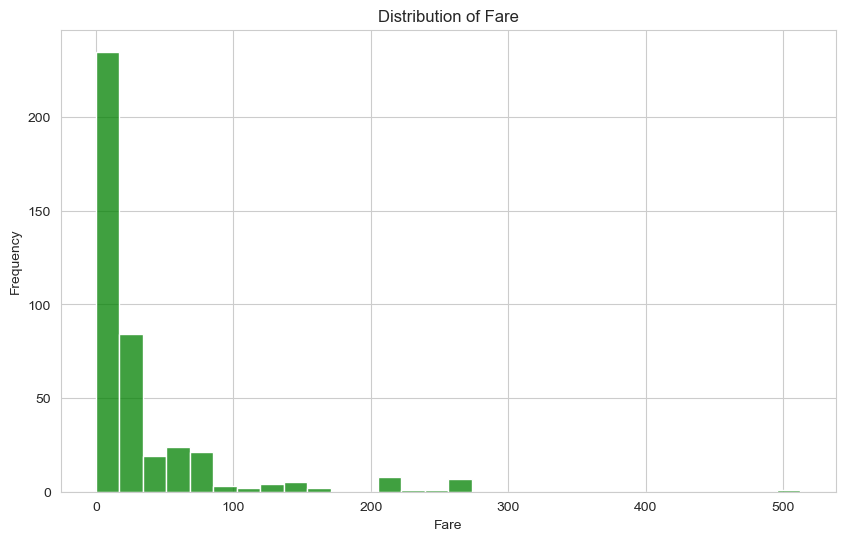

In [22]:
# Plot the distribution of Fare
plt.figure(figsize=(10, 6))
sns.histplot(train['Fare'], bins=30, color='green')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

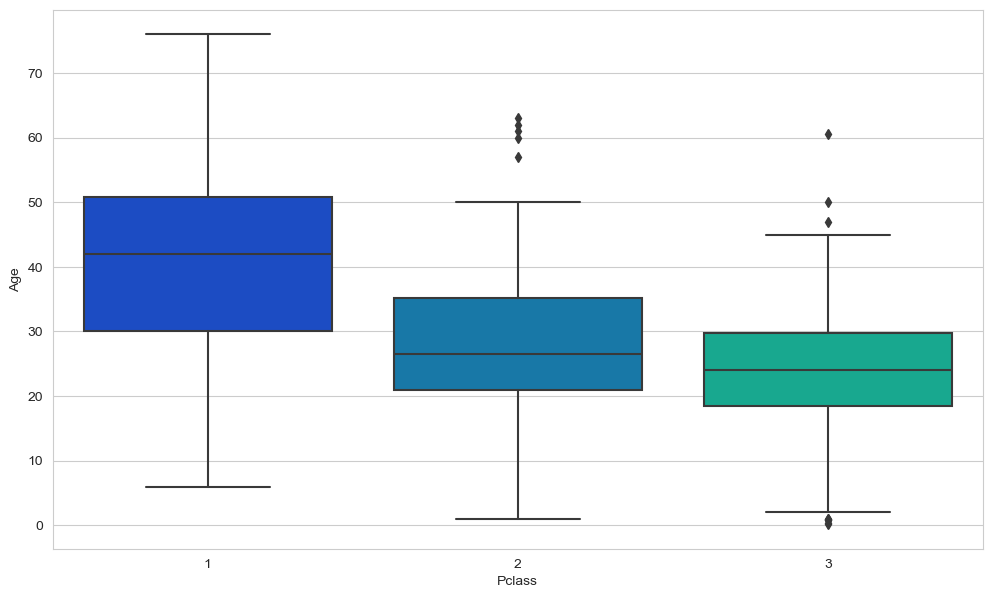

In [80]:
# Box plot for age by passenger class
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')
plt.show()

In [82]:
# Function to impute missing ages
def impute_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [84]:
# Apply the impute_age function
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [86]:
# Drop the 'Cabin' column and any remaining missing values
train.drop('Cabin', axis=1, inplace=True)
train.dropna(inplace=True)

In [88]:
# Print the info of the cleaned dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB
None


In [90]:
# Drop unnecessary columns
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [92]:
# Concatenate the new dummy variables
train = pd.concat([train, sex, embark], axis=1)

In [94]:
# Define features and target variable
X = train.drop('Survived', axis=1)
y = train['Survived']

In [100]:
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [102]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [104]:
# Train the model
logmodel = LogisticRegression(max_iter=500)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [106]:
# Make predictions
predictions = logmodel.predict(X_test)

In [108]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

In [110]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[65  0]
 [ 0 61]]


In [112]:
print("Accuracy:", accuracy)

Accuracy: 1.0


In [114]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        61

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

